## P-value with Linear Regression on Vehicle Dataset ... 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GabbySuwichaya/Statistical-Learning-EE575/blob/master/Tutorial3/pvalue.ipynb)

- [Data visualization](#data-visualization--preprocessing)
- [Hypothesis Testing](#hypothesis-testing) 
    - [Statsmodels P-value](#by-statsmodels-package)
    - [P-value calculation](#implemention-of-the-hypothesis-testing)
        - [Steps of calculating P-value](#summary-of-the-steps)

In [1]:
# ! pip install numpy pandas tqdm matplotlib statsmodels seaborn
# ! pip install -q kaggle

In [2]:
# ! kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

In [3]:
import numpy as np
from numpy import linalg

import pandas as pd 
import matplotlib.pyplot as plt  

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics

import zipfile
foldername = "vehicle-dataset"

In [4]:
# with zipfile.ZipFile("vehicle-dataset-from-cardekho.zip","r") as zip_ref:
#     zip_ref.extractall(foldername)

## Data Visualization & Preprocessing

In [5]:
df = pd.read_csv('%s/car data.csv' % foldername)

print("Raw value before Encoding ...")
## print(np.unique(df['Car_Name'].values))
#print(np.unique(df['Transmission'].values))
#print(np.unique(df['Fuel_Type'].values))
#print(np.unique(df['Seller_Type'].values))

df[['Car_Name', 'Fuel_Type','Seller_Type','Transmission']] = df.loc[:,['Car_Name', 'Fuel_Type','Seller_Type','Transmission']].apply(LabelEncoder().fit_transform)
print("After Encoding: ")
# print(np.unique(df['Car_Name'].values))
# print(np.unique(df['Transmission'].values))
# print(np.unique(df['Fuel_Type'].values))
# print(np.unique(df['Seller_Type'].values))

Raw value before Encoding ...
After Encoding: 


In [6]:
Feat_List = ['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type','Seller_Type','Transmission', 'Owner']
X = df.loc[:, Feat_List].values
y = df['Selling_Price'].values.reshape(-1,1)

In [7]:
X_train_, X_test_, y_train_, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

min_max_scaler_X = StandardScaler()
X_train        = min_max_scaler_X.fit_transform(X_train_)
X_test         = min_max_scaler_X.transform(X_test_) 

min_max_scaler_Y = StandardScaler()
y_train          = min_max_scaler_Y.fit_transform(y_train_) 

## Hypothesis Testing

We test if the true value of the coefficient is equal to zero. 

The statistical test for this is called Hypothesis testing.

- A low P-value (< 0.05) means that the coefficient is likely not to equal zero.

- A high P-value (> 0.05) means that we cannot conclude that the explanatory variable affects the dependent variable (here: if features affects selling_price).

- A high P-value is also called an insignificant P-value.

### By statsmodels package

In [8]:
import statsmodels.api as sm 

model   = sm.OLS(y_train, X_train)
model = model.fit() 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              191.4
Date:                Sun, 14 Jan 2024   Prob (F-statistic):                    1.20e-97
Time:                        02:09:18   Log-Likelihood:                         -97.160
No. Observations:                 240   AIC:                                      210.3
Df Residuals:                     232   BIC:                                      238.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0030      0.043     -0.070      0.944      -0.087       0.081
x2             0.2276      0.029      7.892      0.000       0.171       0.284
x3             0.7709      0.031     24.801      0.000       0.710       0.832
x4            -0.0457      0.029     -1.554      0.122      -0.104       0.012
x5            -0.1207      0.028     -4.386      0.000      -0.175      -0.066
x6            -0.1084      0.043     -2.505      0.013      -0.194      -0.023
x7            -0.0923      0.026     -3.553      0.000      -0.143      -0.041
x8            -0.0466      0.025     -1.876      0.062      -0.095       0.002
==============================================================================
Omnibus:                       89.057   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              681.904
Skew:                           1.236   Prob(JB):                    8.44e-149
Kurtosis:                      10.879   Cond. No.                         3.87
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Implemention of the Hypothesis Testing

In [9]:
from sklearn.linear_model import LinearRegression
from scipy import stats
from numpy import linalg

### Summary of the steps

- Define the Hypothesis Testing: $\beta_i$ = 0

- Find your testing :   $E[\beta_i] = \beta_i$

    - Find $\beta$ ... You can choose to use sklearn or the analytical solution (should get the same result)  

In [10]:
using_sklearn = False 

if using_sklearn:

    regressor  = LinearRegression() 
    lm         = regressor.fit(X_train, y_train) 
    y_predict = lm.predict(X_train)
    beta      = lm.coef_.reshape(-1) 

else:
    
    beta = np.dot(np.linalg.pinv(np.dot(X_train.T,X_train)),np.dot(X_train.T,y_train)) 
    y_predict = X_train @ beta 

    y_predict = y_predict.reshape(-1,1)
    beta      = beta.reshape(-1)

- Find your covariance: $Cov(\beta) = \sigma^2 (X^T X)^{-1}$
    - Here $\sigma^2$ is the noise $n$ in $Y$ where $Y = X \beta + n$
    - $\sigma^2 = \sum_i (y_i - \hat{y}_i)^2 /(N - n)$
    - $Cov(\beta) = \sigma^2 (X^T X)^{-1}$

In [11]:
sigma2  = np.sum((y_predict - y_train) ** 2, axis=0) / float(X_train.shape[0] - X_train.shape[1])
cov_beta  = np.sqrt(sigma2*np.diagonal(np.linalg.pinv(np.dot(X_train.T, X_train))))  

- Calculate the testing $Z = \frac{E[\beta_i] - H0}{Cov(\beta)}$ 

In [12]:
t = beta / cov_beta

- Then, we get the probability that the testing can be accepted is $P(|Z - 0|)$  

- Calculate P-value: $ P_{\alpha} =   1 - P(\theta \in [-Z,Z]) $

- But the CDF $P(z > |Z| = +Z) = 0.5*P_{\alpha}$    

- Therefore, $ P_{\alpha} =   2*(1 - P(z > |Z| = +Z)) $

In [13]:
p_alpha   =   2*(1 - stats.t.cdf(np.abs(t), float(X_train.shape[0] - X_train.shape[1]) ))

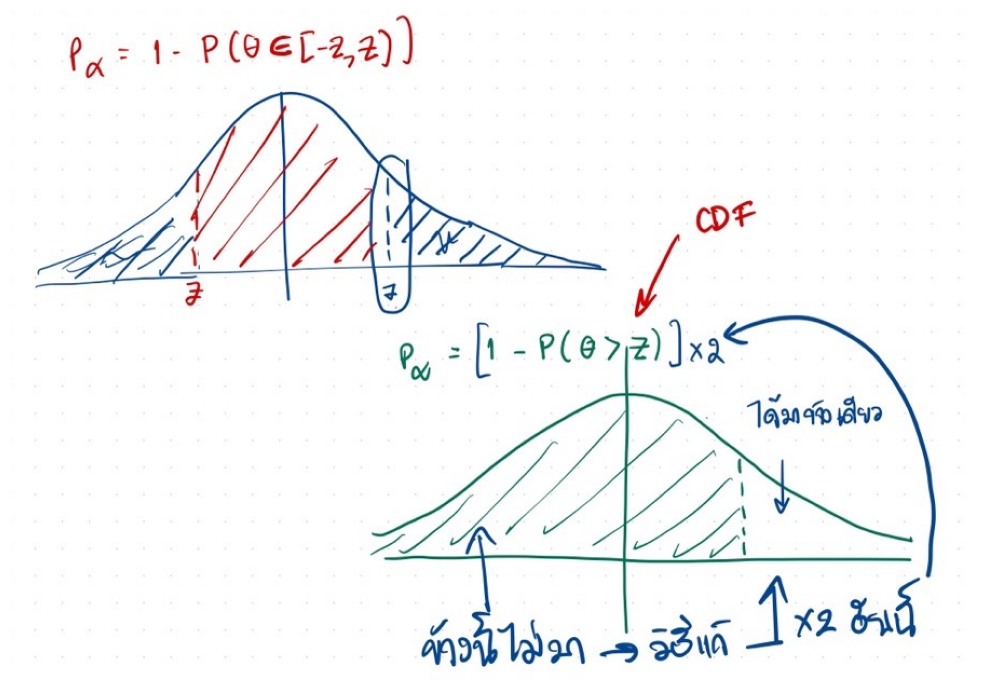

In [14]:
plt.figure(figsize=(21,7)); Image = plt.imread("figures/alpha.png"); plt.axis("off"); plt.imshow(Image); plt.tight_layout()

In [15]:
for i in range(p_alpha.shape[0]):
    print( "[x%d] %02.02f, %.2f" %  (i, t[i], p_alpha[i]))

[x0] -0.07, 0.94
[x1] 7.89, 0.00
[x2] 24.80, 0.00
[x3] -1.55, 0.12
[x4] -4.39, 0.00
[x5] -2.50, 0.01
[x6] -3.55, 0.00
[x7] -1.88, 0.06


You may cross check the above results with the output from statmodel.OLS